In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

In [195]:
# fortran compile
compile_command = "gfortran -o test2.exe dvode_f90_m.F90 master_module.F90 zdplaskin_m.F90 master_code.F90 bolsig_x86_64_g.dll"
run_command = "test2.exe"

In [196]:
# compile 실행
# compile_process = subprocess.run(compile_command, shell=True, check=True)
# print("컴파일 완료")

In [197]:
# try:
#     run_process = subprocess.run(run_command, shell=True, check=True)
#     print("실행 완료")
# except subprocess.CalledProcessError as e:
#     print(f"실행 중 오류 발생: {e}")
#     print(f"표준 출력: {e.stdout}")
#     print(f"표준 에러: {e.stderr}")

In [198]:
conditions_path = 'qt_conditions.txt'

df_cond = pd.read_csv(conditions_path,
                 delim_whitespace=True,
                 header=0)

conditions_columns = ['Time_s', 'Reduced field_Td', 'Gas temperature_K', 'Electron temperature_eV', 'Current density_A/cm2', 'Power density_W/cm3']

df_cond.columns = conditions_columns
df_cond['Electron temperature_eV'] = df_cond['Electron temperature_eV']/11604.518
df_cond['Mean Electron Energy_eV'] = df_cond['Electron temperature_eV']*1.5

In [199]:
df_cond

,Time_s,Reduced field_Td,Gas temperature_K,Electron temperature_eV,Current density_A/cm2,Power density_W/cm3,Mean Electron Energy_eV
0,0.000000e+00,0.0000,400.0,0.000000,0.000000e+00,0.000000e+00,0.000000
1,1.000000e-08,0.0000,400.0,0.034470,0.000000e+00,0.000000e+00,0.051705
2,2.000000e-08,1.0788,400.0,1.709334,0.000000e+00,0.000000e+00,2.564001
3,3.000000e-08,2.1577,400.0,2.402599,1.034400e-48,4.094800e-46,3.603898
4,4.000000e-08,3.2365,400.0,2.901284,0.000000e+00,0.000000e+00,4.351926
...,...,...,...,...,...,...,...
1387,9.995000e-05,6.4745,400.0,3.354297,4.265100e-07,2.050100e-05,5.031446
1388,9.997000e-05,4.3153,400.0,3.226847,2.712800e-07,8.690800e-06,4.840270
1389,9.998000e-05,3.2365,400.0,2.901284,2.484700e-07,5.970000e-06,4.351926
1390,9.999000e-05,2.1586,400.0,2.170706,3.461000e-07,5.546200e-06,3.256059


In [200]:
density_path = 'qt_densities.txt'

df_den = pd.read_csv(density_path,
                 delim_whitespace=True,
                 header=0)

den_list= []

with open('qt_species_list.txt', 'r') as file:
    for line in file:
        den_list.append(line.split()[-1])

density_columns = ['Time_s'] + den_list
df_den.columns = density_columns

In [201]:
df_den

,Time_s,E,AR,AR*,AR^+,E(W),AR(W)*,AR(W)^+
0,0.000000e+00,1.000000e+00,1.834700e+19,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000e-08,2.738500e-05,1.834700e+19,0.000000e+00,9.999900e-01,9.999700e-01,0.000000e+00,1.143500e-05
2,2.000000e-08,0.000000e+00,1.834700e+19,0.000000e+00,9.999900e-01,2.000000e+00,0.000000e+00,2.286400e-05
3,3.000000e-08,1.778300e-35,1.834700e+19,1.706600e-08,9.999900e-01,3.000000e+00,1.927400e-13,3.428900e-05
4,4.000000e-08,0.000000e+00,1.834700e+19,3.081800e-05,9.999900e-01,4.000000e+00,3.489500e-10,4.572100e-05
...,...,...,...,...,...,...,...,...
1387,9.995000e-05,3.601600e+06,7.423800e+17,8.163500e+12,1.574400e+19,1.760500e+19,7.682800e+12,1.860500e+18
1388,9.997000e-05,3.670200e+06,7.423800e+17,8.161400e+12,1.574400e+19,1.760500e+19,7.683000e+12,1.860900e+18
1389,9.998000e-05,3.869700e+06,7.423800e+17,8.160400e+12,1.574400e+19,1.760500e+19,7.683100e+12,1.861000e+18
1390,9.999000e-05,4.472500e+06,7.423800e+17,8.159400e+12,1.574400e+19,1.760500e+19,7.683200e+12,1.861200e+18


c:\Users\USER\.conda\envs\qtplaskin_env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


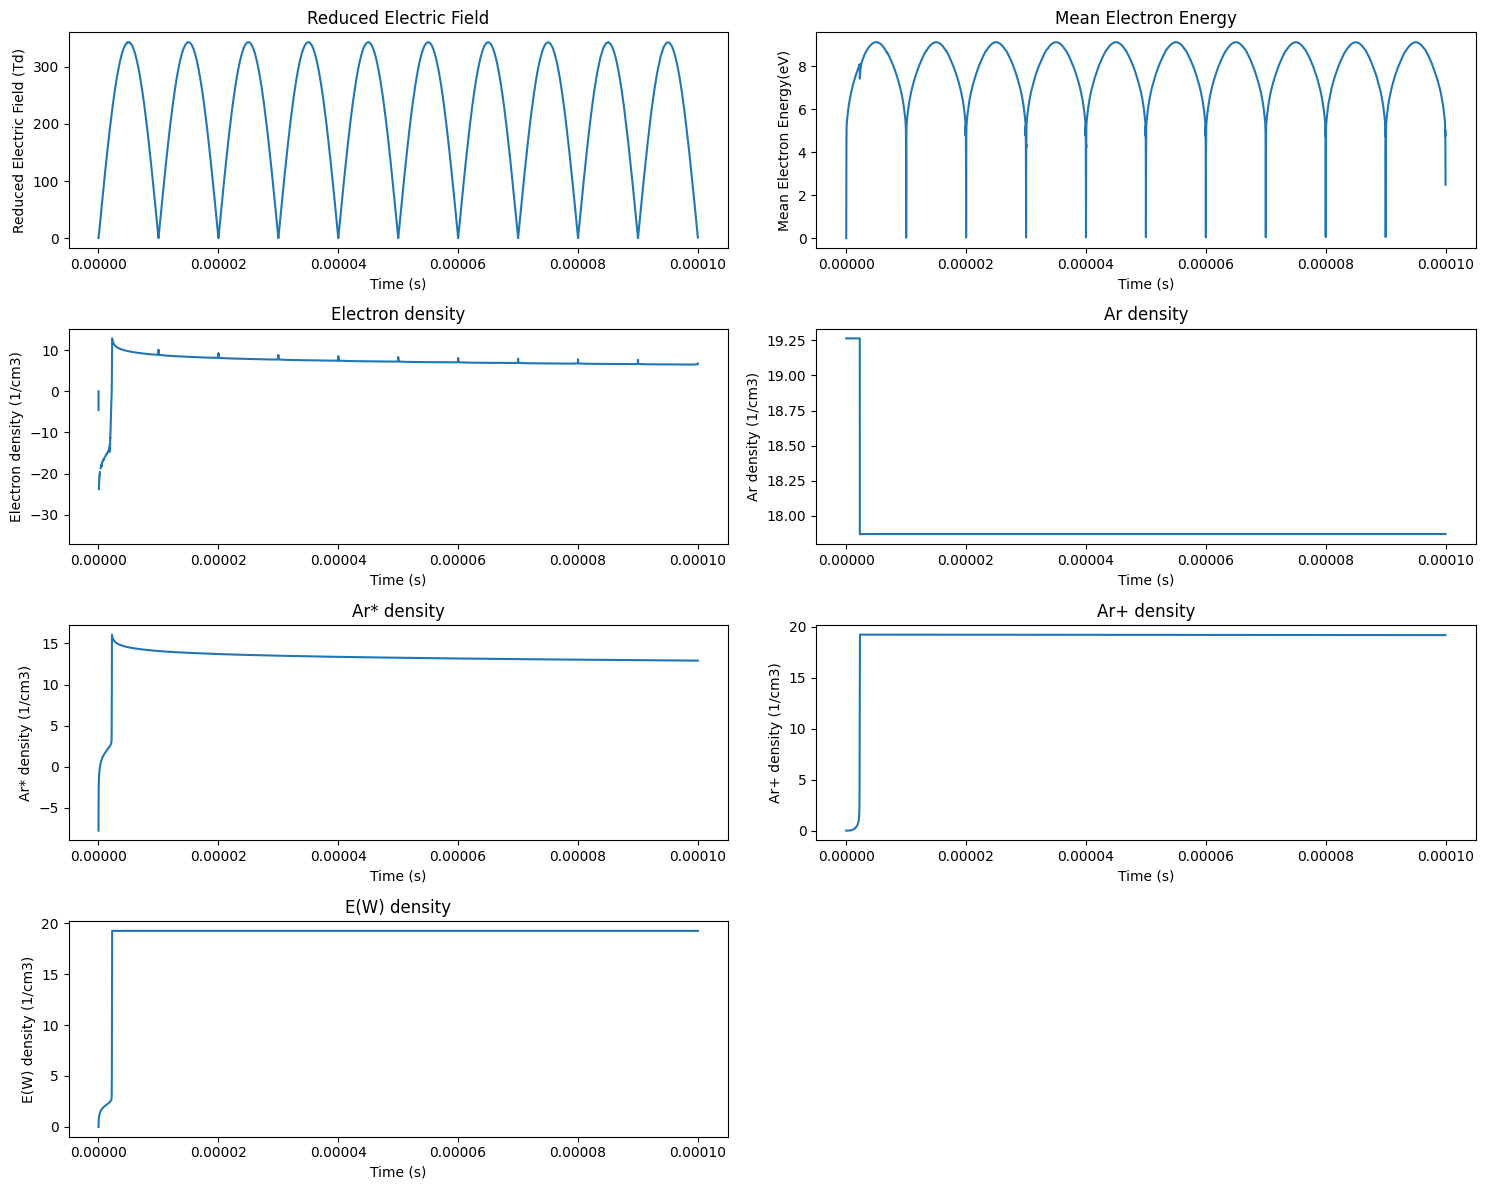

In [202]:
# 결과 플로팅
plt.figure(figsize=(15, 12))

plt.subplot(421)
plt.plot(df_cond['Time_s'], df_cond['Reduced field_Td'])
plt.title('Reduced Electric Field')
plt.xlabel('Time (s)')
plt.ylabel('Reduced Electric Field (Td)')

plt.subplot(422)
plt.plot(df_cond['Time_s'], df_cond['Mean Electron Energy_eV'])
plt.title('Mean Electron Energy')
plt.xlabel('Time (s)')
plt.ylabel('Mean Electron Energy(eV)')

plt.subplot(423)
plt.plot(df_den['Time_s'], df_den['E'])
plt.title('Electron density')
plt.xlabel('Time (s)')
plt.ylabel('Electron density (1/cm3)')

plt.subplot(424)
plt.plot(df_den['Time_s'], np.log10(df_den['AR']))
plt.title('Ar density')
plt.xlabel('Time (s)')
plt.ylabel('Ar density (1/cm3)')

plt.subplot(425)
plt.plot(df_den['Time_s'], np.log10(df_den['AR*']))
plt.title('Ar* density')
plt.xlabel('Time (s)')
plt.ylabel('Ar* density (1/cm3)')

plt.subplot(426)
plt.plot(df_den['Time_s'], np.log10(df_den['AR^+']))
plt.title('Ar+ density')
plt.xlabel('Time (s)')
plt.ylabel('Ar+ density (1/cm3)')

plt.subplot(427)
plt.plot(df_den['Time_s'], np.log10(df_den['E(W)']))
plt.title('E(W) density')
plt.xlabel('Time (s)')
plt.ylabel('E(W) density (1/cm3)')

plt.tight_layout()
plt.show()

In [203]:
df.columns

NameError: name 'df' is not defined